1. Tiến hành hiểu dữ liệu từ chuyên gia 
“The data set has been kept small enough for you to be able to grok it all at once. The 
data is in csv format. Each row in the dataset has data about different individuals and 
their heart rate details for different time intervals. The columns contain information such 
as individual’s Age, Weight, Sex and Heart Rates taken at different time intervals.” 
2. Thông thường ta thường xử lý các vấn đề sau về dữ liệu 
    - 1. Thiếu dòng tiêu đề ở  file csv 
    - 2. Nhiều biến lưu ở một cột 
    - 3. Dữ liệu cột chứa các giá trị đơn vị không nhất quán 
    - 4. Dữ liệu có một dòng trống 
    - 5. Dữ liệu có các dòng trùng lặp 
    - 6. Các ký tự không phải ASCII 
    - 7. Giá trị bị mất 
    - 8. Tiêu đề cột là giá trị chứ  không phải tên biến 
3. Vấn đề 1: Tiến hành tải dữ liệu vào chương trình ứng dụng Python và giải quyết vấn đề 
“Missing header in the csv file”
4. Vấn đề 2: Xử lý vấn đề một cột lưu hỗn hợp nhiều dữ liệu, ở đây là cột “Name” chứa bao gồm “Firstname” và “Lastname”, giải pháp là ta sẽ tách ra làm 2 cột.
5. Vấn đề 3: Cột Weight có vấn đề về không thống nhất các đơn vị đo lường trong dữ liệu. Ta sẽ chuyển các đơn vị về thành đơn vị chuẩn “kg".
6. Vấn đề 4: Vấn đề về xuất hiện dòng dữ liệu rỗng (không có giá trị: NaN). Giải pháp có thể đưa ra là xóa bỏ.
7. Vấn đề 5: Có nhiều dòng dữ liệu bị trùng lắp thông tin hoàn toàn[fullname, lastname, age, weight,....], giải pháp đưa ra là chỉ giữ lại một dòng dữ liệu, tuy nhiên giải pháp phải dựa trên nghiệp vụ của tập dữ liệu và quan sát của người xử lý. 
8. Vấn đề 6: Xuất hiện dữ liệu bị ảnh hưởng bởi lỗi non-ASCII, không định dạng ASCII. Giải pháp: Tùy vào nghiệp vụ ta có thể: xóa dữ liệu tại đó, thay thế bằng dữ liệu khác hoặc thay bằng việc đánh dấu bằng một kí tự khác (ví dụ: ‘warning’).
9. Vấn đề 7: “Missing values”, vấn đề này xảy ra tại các cột “Age”, “Weight” và “Heart Rate”. Thiếu dữ liệu (dữ liệu không đầy đủ) là vấn đề xảy ra nhiều trong các nguồn dữ liệu do nhiều nguyên nhân chủ quan lẫn khách quan.Có một vài giải pháp để xử lý vấn đề này, chủ yếu dựa trên kinh nghiệm và nghiệp vụ về tập dữ liệu đó. Một số giải pháp đưa đề xuất từ chuyên gia như sau: 
    - a. Deletion: Remove records with missing values 
    - b. Dummy substitution: Replace missing values with a dummy but valid value: e.g.: 0 for numerical values. 
    - c. Mean substitution: Replace the missing values with the mean. 
    - d. Frequent substitution: Replace the missing values with the most frequent item. 
    - e. Improve the data collector: Your business folk will talk to the clients and inform them about why it is worth fixing the problem with the data collector. 
10. Vấn đề 8: “một cột chứa quá nhiều thông tin cần được phân rã”, như trong bài toán này ta thấy header “m0006” chứa các nội dung bao gồm: m → male, 1218 ~ 12-18 (mm-dd). Còn giá trị thì là kết quả huyết áp. 
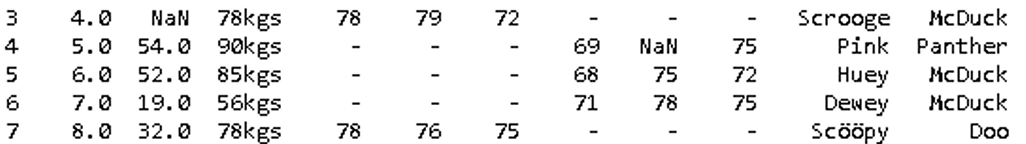
Chúng ta sẽ tách nội dung của cột này ra làm 3 cột sau: PulseRate : giá trị huyết áp, Sex: giới tính ( m: male, f: female) và time: thời gian (tháng-ngày) như sau: 
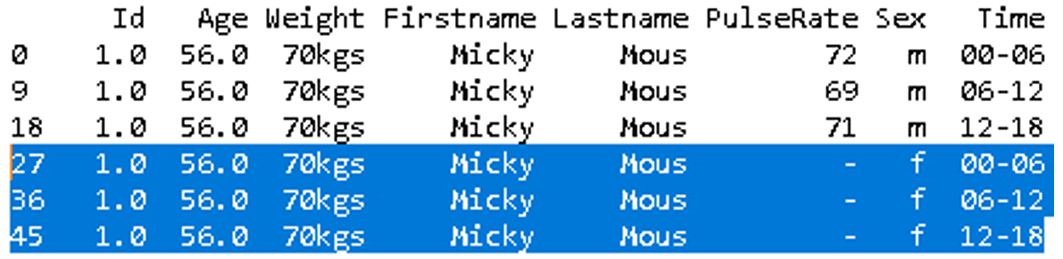
11. Hãy khảo sát tỉ lệ dữ liệu thiếu trên biến huyết áp. Dữ liệu bị thiếu thì hãy xử lý bằng 
phương pháp sau:
    - Thay thế bằng giá trị trung bình liền trước và liền sau của người đó. Nếu không được thì dùng 2
    - Thay thế bằng giá trị trung bình 2 giá liền trước của người đó. Nếu không được thì dùng 3
    - Thay thế bằng giá trị trung bình 2 giá liền sau của người đó. Nếu không được thì dùng 4
    - Trung bình của các giá trị huyết áp của người đó. Nếu không được thì dùng 5. 
    - Trung bình của các giá trị huyết áp của nhóm giới tính. Nếu không được thì dùng 6
    - Trung bình của các giá trị dữ liệu. Nếu không được thì thay bằng mức ổn định 
    trong y học.  
12. Hãy rút gọn dữ liệu phù hợp và reindex lại dữ liệu. Sau đó, lưu trữ dữ liệu đã xử lý thành công với tên file patient_heart_rate_clean.csv
    - Lưu ý: Ngoài ra còn rất nhiều vấn đề về mặt xử lý dữ liệu dựa trên nhiều khía cạnh khác nhau tùy vào sự am hiểu về dữ liệu của các chuyên gia như:
       - Handling dates
       - Correcting character encodings (a problem you hit when you scrape data off theweb)

In [1]:
# Câu 3: Vấn đề 1: Tiến hành tải dữ liệu vào chương trình ứng dụng Python và giải quyết vấn đề “Missing header in the csv file”

import pandas as pd

# Định nghĩa tên cột cho dữ liệu
column_names = ["Id", "Name", "Age", "Weight", "m0006", "m0612", "m1218", "f0006", "f0612", "f1218"]

# Đọc file CSV và bỏ qua các dòng lỗi (sai định dạng số cột)
df = pd.read_csv("patient_heart_rate.csv", names=column_names, on_bad_lines='skip')

# Hiển thị một vài dòng đầu tiên của dữ liệu
print(df)

      Id            Name   Age      Weight m0006 m0612 m1218 f0006 f0612 f1218
0    1.0    Mickéy Mousé  56.0       70kgs    72    69    71     -     -     -
1    2.0     Donald Duck  34.0   154.89lbs     -     -     -    85    84    76
2    3.0      Mini Mouse  16.0         NaN     -     -     -    65    69    72
3    4.0  Scrooge McDuck   NaN       78kgs    78    79    72     -     -     -
4    5.0    Pink Panther  54.0  198.658lbs     -     -     -    69   NaN    75
5    6.0     Huey McDuck  52.0      189lbs     -     -     -    68    75    72
6    7.0    Dewey McDuck  19.0       56kgs     -     -     -    71    78    75
7    8.0      Scööpy Doo  32.0       78kgs    78    76    75     -     -     -
8    NaN             NaN   NaN         NaN   NaN   NaN   NaN   NaN   NaN   NaN
9    NaN             NaN   NaN         NaN   NaN   NaN   NaN   NaN   NaN   NaN
10   9.0     Huey McDuck  52.0      189lbs     -     -     -    68    75    72
11  10.0    Louie McDuck  12.0       45kgs     -    

In [2]:
# Câu 4: Vấn đề 2: Xử lý vấn đề một cột lưu hỗn hợp nhiều dữ liệu, ở đây là cột “Name” chứa bao 
# gồm “Firstname” và “Lastname”, giải pháp là ta sẽ tách ra làm 2 cột  
df[['Firstname', 'Lastname']] = df['Name'].str.split(expand=True)
df.drop('Name', axis=1)
print(df)

      Id            Name   Age      Weight m0006 m0612 m1218 f0006 f0612  \
0    1.0    Mickéy Mousé  56.0       70kgs    72    69    71     -     -   
1    2.0     Donald Duck  34.0   154.89lbs     -     -     -    85    84   
2    3.0      Mini Mouse  16.0         NaN     -     -     -    65    69   
3    4.0  Scrooge McDuck   NaN       78kgs    78    79    72     -     -   
4    5.0    Pink Panther  54.0  198.658lbs     -     -     -    69   NaN   
5    6.0     Huey McDuck  52.0      189lbs     -     -     -    68    75   
6    7.0    Dewey McDuck  19.0       56kgs     -     -     -    71    78   
7    8.0      Scööpy Doo  32.0       78kgs    78    76    75     -     -   
8    NaN             NaN   NaN         NaN   NaN   NaN   NaN   NaN   NaN   
9    NaN             NaN   NaN         NaN   NaN   NaN   NaN   NaN   NaN   
10   9.0     Huey McDuck  52.0      189lbs     -     -     -    68    75   
11  10.0    Louie McDuck  12.0       45kgs     -     -     -    92    95   
12  11.0    

In [3]:
# Câu 5: Vấn đề 3: Xử lý vấn đề dữ liệu bị thiếu, ở đây là cột 
# “Age” có giá trị thiếu, giải pháp

# Get the Weight column
weight = df['Weight']

for i in range(0, len(weight)):
    x = str(weight[i])
    # Incanse lbs is part of observation remove it
    if "lbs" in x:
        # Remove the lbs from the value
        x = x[:-3:]
        # Convert string to float
        float_x = float(x)
        # Convert to kgs and store as int
        y = int(float_x / 2.2)
        # Convert back to string
        y = str(y) + "kgs"
        weight[i] = y
print(df)

      Id            Name   Age Weight m0006 m0612 m1218 f0006 f0612 f1218  \
0    1.0    Mickéy Mousé  56.0  70kgs    72    69    71     -     -     -   
1    2.0     Donald Duck  34.0  70kgs     -     -     -    85    84    76   
2    3.0      Mini Mouse  16.0    NaN     -     -     -    65    69    72   
3    4.0  Scrooge McDuck   NaN  78kgs    78    79    72     -     -     -   
4    5.0    Pink Panther  54.0  90kgs     -     -     -    69   NaN    75   
5    6.0     Huey McDuck  52.0  85kgs     -     -     -    68    75    72   
6    7.0    Dewey McDuck  19.0  56kgs     -     -     -    71    78    75   
7    8.0      Scööpy Doo  32.0  78kgs    78    76    75     -     -     -   
8    NaN             NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
9    NaN             NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10   9.0     Huey McDuck  52.0  85kgs     -     -     -    68    75    72   
11  10.0    Louie McDuck  12.0  45kgs     -     -     -    92    95    87   

C:\Users\Tran Thinh\AppData\Local\Temp\ipykernel_23360\2786555427.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i] = y
C:\Users\Tran Thinh\AppData\Local\Temp\ipykernel_23360\2786555427.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i] = y
C:\Users\Tran Thinh\AppData\Local\Temp\ipykernel_23360\2786555427.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i] = y
C:\Users\Tran Thinh\AppData\Local\Temp\i

In [4]:
# Câu 6: Vấn đề 4: Vấn đề về xuất hiện dòng dữ liệu rỗng (không có giá trị: NaN). Giải pháp có 
# thể đưa ra là xóa bỏ 

df.dropna(how='all', inplace=True)
print(df)

      Id            Name   Age Weight m0006 m0612 m1218 f0006 f0612 f1218  \
0    1.0    Mickéy Mousé  56.0  70kgs    72    69    71     -     -     -   
1    2.0     Donald Duck  34.0  70kgs     -     -     -    85    84    76   
2    3.0      Mini Mouse  16.0    NaN     -     -     -    65    69    72   
3    4.0  Scrooge McDuck   NaN  78kgs    78    79    72     -     -     -   
4    5.0    Pink Panther  54.0  90kgs     -     -     -    69   NaN    75   
5    6.0     Huey McDuck  52.0  85kgs     -     -     -    68    75    72   
6    7.0    Dewey McDuck  19.0  56kgs     -     -     -    71    78    75   
7    8.0      Scööpy Doo  32.0  78kgs    78    76    75     -     -     -   
10   9.0     Huey McDuck  52.0  85kgs     -     -     -    68    75    72   
11  10.0    Louie McDuck  12.0  45kgs     -     -     -    92    95    87   
12  11.0       Henry Nam   NaN  60kgs    78    75    72     -     -     -   
13  12.0     Michel Long  34.0    NaN    65    67    55     -     -     -   

In [5]:
# Câu 7: Vấn đề 5: Có nhiều dòng dữ liệu bị trùng lắp thông tin hoàn toàn[fullname, lastname, 
# age, weight,....], giải pháp đưa ra là chỉ giữ lại một dòng dữ liệu, tuy nhiên giải pháp phải 
# dựa trên nghiệp vụ của tập dữ liệu và quan sát của người xử lý.

df = df.drop_duplicates(subset=['Firstname', 'Lastname', 'Age', 'Weight'])
print(df)

      Id            Name   Age Weight m0006 m0612 m1218 f0006 f0612 f1218  \
0    1.0    Mickéy Mousé  56.0  70kgs    72    69    71     -     -     -   
1    2.0     Donald Duck  34.0  70kgs     -     -     -    85    84    76   
2    3.0      Mini Mouse  16.0    NaN     -     -     -    65    69    72   
3    4.0  Scrooge McDuck   NaN  78kgs    78    79    72     -     -     -   
4    5.0    Pink Panther  54.0  90kgs     -     -     -    69   NaN    75   
5    6.0     Huey McDuck  52.0  85kgs     -     -     -    68    75    72   
6    7.0    Dewey McDuck  19.0  56kgs     -     -     -    71    78    75   
7    8.0      Scööpy Doo  32.0  78kgs    78    76    75     -     -     -   
11  10.0    Louie McDuck  12.0  45kgs     -     -     -    92    95    87   
12  11.0       Henry Nam   NaN  60kgs    78    75    72     -     -     -   
13  12.0     Michel Long  34.0    NaN    65    67    55     -     -     -   
14  13.0      Tana Ricky   NaN    NaN     -     -     -    68    72    70   

In [6]:
# Câu 8: Vấn đề 6: Xuất hiện dữ liệu bị ảnh hưởng bởi lỗi non-ASCII, không định dạng ASCII. Giải pháp: Tùy vào nghiệp vụ ta có thể: xóa dữ liệu tại đó, thay thế 
# bằng dữ liệu khác hoặc thay bằng việc đánh dấu bằng một kí tự khác (ví dụ: ‘warning’).

df.Firstname.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
df.Lastname.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
print(df)

      Id            Name   Age Weight m0006 m0612 m1218 f0006 f0612 f1218  \
0    1.0    Mickéy Mousé  56.0  70kgs    72    69    71     -     -     -   
1    2.0     Donald Duck  34.0  70kgs     -     -     -    85    84    76   
2    3.0      Mini Mouse  16.0    NaN     -     -     -    65    69    72   
3    4.0  Scrooge McDuck   NaN  78kgs    78    79    72     -     -     -   
4    5.0    Pink Panther  54.0  90kgs     -     -     -    69   NaN    75   
5    6.0     Huey McDuck  52.0  85kgs     -     -     -    68    75    72   
6    7.0    Dewey McDuck  19.0  56kgs     -     -     -    71    78    75   
7    8.0      Scööpy Doo  32.0  78kgs    78    76    75     -     -     -   
11  10.0    Louie McDuck  12.0  45kgs     -     -     -    92    95    87   
12  11.0       Henry Nam   NaN  60kgs    78    75    72     -     -     -   
13  12.0     Michel Long  34.0    NaN    65    67    55     -     -     -   
14  13.0      Tana Ricky   NaN    NaN     -     -     -    68    72    70   

C:\Users\Tran Thinh\AppData\Local\Temp\ipykernel_23360\2912863713.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Firstname.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
C:\Users\Tran Thinh\AppData\Local\Temp\ipykernel_23360\2912863713.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [ ]:
# Câu 9: Vấn đề 7: “Missing values”, vấn đề này xảy ra tại các cột “Age”, “Weight” và “Heart Rate”. Thiếu dữ liệu (dữ liệu không đầy đủ) là vấn đề 
# xảy ra nhiều trong các nguồn dữ liệu do nhiều nguyên nhân chủ quan lẫn khách quan.Có một vài giải pháp để xử lý vấn đề này, chủ yếu dựa trên 
# kinh nghiệm và nghiệp vụ về tập dữ liệu đó.

import pandas as pd

# Giả sử df là DataFrame hiện tại
# Thống kê thông tin dữ liệu thiếu trên từng biến Age và Weight
missing_values = df[['Age', 'Weight']].isnull().sum()
print("Số lượng giá trị thiếu trên từng cột:")
print(missing_values)

# Tính giá trị trung bình của Age và Weight (bỏ qua giá trị NaN)
mean_age = df['Age'].mean()
mean_weight = df['Weight'].mean()

# Thay thế giá trị thiếu trong Age và Weight bằng giá trị trung bình
df['Age'].fillna(mean_age, inplace=True)
df['Weight'].fillna(mean_weight, inplace=True)

# Xóa các dòng thiếu cả Age và Weight
df.dropna(subset=['Age', 'Weight'], how='all', inplace=True)

# Kiểm tra lại dữ liệu sau khi xử lý
print("Số lượng giá trị thiếu sau khi xử lý:")
print(df[['Age', 'Weight']].isnull().sum())

# In ra DataFrame sau khi xử lý
print("\nDataFrame sau khi xử lý:")
print(df)

Số lượng giá trị thiếu trên từng cột:
Age       0
Weight    3
dtype: int64
Id           0
Name         1
Age          0
Weight       3
m0006        0
m0612        0
m1218        0
f0006        0
f0612        1
f1218        0
Firstname    1
Lastname     1
dtype: int64
      Id            Name   Age Weight m0006 m0612 m1218 f0006 f0612 f1218  \
0    1.0    Mickéy Mousé  56.0  70kgs    72    69    71     -     -     -   
1    2.0     Donald Duck  34.0  70kgs     -     -     -    85    84    76   
2    3.0      Mini Mouse  16.0    NaN     -     -     -    65    69    72   
3    4.0  Scrooge McDuck  36.1  78kgs    78    79    72     -     -     -   
4    5.0    Pink Panther  54.0  90kgs     -     -     -    69   NaN    75   
5    6.0     Huey McDuck  52.0  85kgs     -     -     -    68    75    72   
6    7.0    Dewey McDuck  19.0  56kgs     -     -     -    71    78    75   
7    8.0      Scööpy Doo  32.0  78kgs    78    76    75     -     -     -   
11  10.0    Louie McDuck  12.0  45kgs  

C:\Users\Tran Thinh\AppData\Local\Temp\ipykernel_24520\2605081882.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mean_age, inplace=True)


In [7]:
# Câu 10: Vấn đề 8: “một cột chứa quá nhiều thông tin cần được phân rã”, như trong bài toán này ta 
# thấy header “m0006” chứa các nội dung bao gồm: m → male, 1218 ~ 12-18 (mm-dd). 
# Còn giá trị thì là kết quả huyết áp. 
# Chúng ta sẽ tách nội dung của cột này ra làm 3 cột sau: PulseRate : giá trị huyết áp, Sex: 
# giới tính ( m: male, f: female) và time: thời gian (tháng-ngày) như sau:
import pandas as pd

# Đọc dữ liệu từ file CSV
df = pd.read_csv("patient_heart_rate.csv", header=None, on_bad_lines='skip')

# Kiểm tra dữ liệu
print(df.head())

# Đặt tên cho các cột dựa trên quan sát
df.columns = ['Id', 'Name', 'Age', 'Weight', 'm0006', 'm0612', 'm1218', 'f0006', 'f0612', 'f1218']

# Sử dụng melt để gom các cột huyết áp lại thành một cột duy nhất
df = df.melt(id_vars=['Id', 'Name', 'Age', 'Weight'], var_name="sex_and_time", value_name="PulseRate")

# Loại bỏ các dòng có giá trị NaN (dữ liệu không có kết quả huyết áp)
df = df.dropna(subset=['PulseRate'])

# Tách cột "sex_and_time" thành 2 cột: Sex và Time
df[['Sex', 'Time']] = df['sex_and_time'].str.extract(r"([mf])(\d{4})")

# Chuyển đổi định dạng thời gian từ "0006" thành "00-06"
df["Time"] = df["Time"].apply(lambda x: f"{x[:2]}-{x[2:]}")

# Xóa cột không cần thiết
df = df.drop(columns=['sex_and_time'])

# Lưu kết quả ra file mới
df.to_csv("output.csv", index=False)

# Hiển thị dữ liệu đã xử lý
print(df)

     0               1     2           3   4   5   6   7    8   9
0  1.0    Mickéy Mousé  56.0       70kgs  72  69  71   -    -   -
1  2.0     Donald Duck  34.0   154.89lbs   -   -   -  85   84  76
2  3.0      Mini Mouse  16.0         NaN   -   -   -  65   69  72
3  4.0  Scrooge McDuck   NaN       78kgs  78  79  72   -    -   -
4  5.0    Pink Panther  54.0  198.658lbs   -   -   -  69  NaN  75
      Id            Name   Age      Weight PulseRate Sex   Time
0    1.0    Mickéy Mousé  56.0       70kgs        72   m  00-06
1    2.0     Donald Duck  34.0   154.89lbs         -   m  00-06
2    3.0      Mini Mouse  16.0         NaN         -   m  00-06
3    4.0  Scrooge McDuck   NaN       78kgs        78   m  00-06
4    5.0    Pink Panther  54.0  198.658lbs         -   m  00-06
..   ...             ...   ...         ...       ...  ..    ...
91  10.0    Louie McDuck  12.0       45kgs        87   f  12-18
92  11.0       Henry Nam   NaN       60kgs         -   f  12-18
93  12.0     Michel Long  34

In [ ]:
# 11. Hãy khảo sát tỉ lệ dữ liệu thiếu trên biến huyết áp. Dữ liệu bị thiếu thì hãy xử lý bằng phương pháp sau
# • Thay thế bằng giá trị trung bình liền trước và liền sau của người đó. Nếu không được thì dùng 2)
# • Thay thế bằng giá trị trung bình 2 giá liền trước của người đó. Nếu không được thì dùng 3)
# • Thay thế bằng giá trị trung bình 2 giá liền sau của người đó. Nếu không được thì dùng 4)
# • Trung bình của các giá trị huyết áp của người đó. Nếu không được thì dùng 5).
# • Trung bình của các giá trị huyết áp của nhóm giới tính. Nếu không được thì dùng 6)
# • Trung bình của các giá trị dữ liệu. Nếu không được thì thay bằng mức ổn định trong y học. 

import pandas as pd

# Đọc dữ liệu từ file CSV sau khi đã phân rã cột
df = pd.read_csv("output.csv")

# 1. Khảo sát tỉ lệ dữ liệu thiếu trong cột 'PulseRate'
missing_values = df['PulseRate'].isnull().sum()
total_values = len(df)
missing_percentage = (missing_values / total_values) * 100
print(f"Tỉ lệ dữ liệu thiếu trong cột 'PulseRate': {missing_percentage:.2f}%")

# 2. Xử lý dữ liệu thiếu trong cột 'PulseRate' theo các phương pháp đã đề ra

# Phương pháp 1: Thay thế bằng giá trị trung bình liền trước và liền sau
def fill_missing_pulserate(row, index, df):
    if pd.isnull(row['PulseRate']):
        # Phương pháp 1: Thay thế bằng giá trị trung bình liền trước và liền sau
        if index > 0 and index < len(df) - 1:  # Kiểm tra không phải dòng đầu hoặc cuối
            prev_value = df.at[index - 1, 'PulseRate']
            next_value = df.at[index + 1, 'PulseRate']
            if pd.notnull(prev_value) and pd.notnull(next_value):
                return (prev_value + next_value) / 2

        # Phương pháp 2: Thay thế bằng giá trị trung bình 2 giá trị liền trước
        if index > 1:
            prev_2_value = df.at[index - 2, 'PulseRate']
            prev_1_value = df.at[index - 1, 'PulseRate']
            if pd.notnull(prev_2_value) and pd.notnull(prev_1_value):
                return (prev_2_value + prev_1_value) / 2

        # Phương pháp 3: Thay thế bằng giá trị trung bình 2 giá trị liền sau
        if index < len(df) - 2:
            next_1_value = df.at[index + 1, 'PulseRate']
            next_2_value = df.at[index + 2, 'PulseRate']
            if pd.notnull(next_1_value) and pd.notnull(next_2_value):
                return (next_1_value + next_2_value) / 2

        # Phương pháp 4: Thay thế bằng trung bình huyết áp của người đó
        avg_pulse_rate = df['PulseRate'].mean()
        if pd.notnull(avg_pulse_rate):
            return avg_pulse_rate

        # Phương pháp 5: Thay thế bằng trung bình huyết áp của nhóm giới tính
        gender_group_avg = df.groupby('Sex')['PulseRate'].mean()
        gender = row['Sex']
        if gender in gender_group_avg:
            return gender_group_avg[gender]

        # Phương pháp 6: Thay thế bằng trung bình của tất cả giá trị huyết áp
        overall_avg = df['PulseRate'].mean()
        if pd.notnull(overall_avg):
            return overall_avg

        # Phương pháp 7: Thay thế bằng mức ổn định trong y học
        return 120  # Mức ổn định huyết áp trong y học

    return row['PulseRate']

# Áp dụng phương pháp xử lý cho từng dòng trong DataFrame
df['PulseRate'] = df.apply(lambda row: fill_missing_pulserate(row, row.name, df), axis=1)

# 3. In kết quả sau khi xử lý
missing_values_after = df['PulseRate'].isnull().sum()
print(f"Số lượng dữ liệu thiếu sau khi xử lý: {missing_values_after}")
print(f"Tỉ lệ dữ liệu thiếu sau khi xử lý: {(missing_values_after / total_values) * 100:.2f}%")

# 4. Lưu kết quả ra file mới sau khi xử lý
df.to_csv("output_processed.csv", index=False)

# Hiển thị dữ liệu đã xử lý
print(df)

Tỉ lệ dữ liệu thiếu trong cột 'PulseRate': 0.00%
Số lượng dữ liệu thiếu sau khi xử lý: 0
Tỉ lệ dữ liệu thiếu sau khi xử lý: 0.00%
      Id            Name   Age      Weight PulseRate Sex   Time
0    1.0    Mickéy Mousé  56.0       70kgs        72   m  00-06
1    2.0     Donald Duck  34.0   154.89lbs         -   m  00-06
2    3.0      Mini Mouse  16.0         NaN         -   m  00-06
3    4.0  Scrooge McDuck   NaN       78kgs        78   m  00-06
4    5.0    Pink Panther  54.0  198.658lbs         -   m  00-06
..   ...             ...   ...         ...       ...  ..    ...
78  10.0    Louie McDuck  12.0       45kgs        87   f  12-18
79  11.0       Henry Nam   NaN       60kgs         -   f  12-18
80  12.0     Michel Long  34.0         NaN         -   f  12-18
81  13.0      Tana Ricky   NaN         NaN        70   f  12-18
82  15.0             NaN  52.0      180lbs        72   f  12-18

[83 rows x 7 columns]


In [11]:
# Câu 12: Hãy rút gọn dữ liệu phù hợp và reindex lại dữ liệu. Sau đó, lưu trữ dữ liệu đã xử lý thành
# công với tên file patient_heart_rate_clean.csv
# Lưu ý: Ngoài ra còn rất nhiều vấn đề về mặt xử lý dữ liệu dựa trên nhiều khía cạnh khác
# nhau tùy vào sự am hiểu về dữ liệu của các chuyên gia như:
# • Handling dates
# • Correcting character encodings (a problem you hit when you scrape data off the web)

import pandas as pd

# Đọc dữ liệu đã xử lý từ file CSV
df = pd.read_csv("output_processed.csv")

# Rút gọn dữ liệu: Chỉ giữ lại các cột quan trọng
df = df[['Id', 'Name', 'Age', 'Sex', 'Time', 'PulseRate']]  # Giữ lại cột quan trọng

# Xử lý ngày tháng (Handling dates): Nếu có cột ngày tháng, chúng ta chuyển đổi thành định dạng chuẩn
df['Time'] = pd.to_datetime(df['Time'], format='%m-%d', errors='coerce')

# Reindex lại dữ liệu: Đặt lại chỉ mục sau khi xử lý
df.reset_index(drop=True, inplace=True)

# Lưu trữ dữ liệu đã xử lý vào file CSV
df.to_csv("patient_heart_rate_clean.csv", index=False)

# Hiển thị dữ liệu đã xử lý
print(df.head())


    Id            Name   Age Sex Time PulseRate
0  1.0    Mickéy Mousé  56.0   m  NaT        72
1  2.0     Donald Duck  34.0   m  NaT         -
2  3.0      Mini Mouse  16.0   m  NaT         -
3  4.0  Scrooge McDuck   NaN   m  NaT        78
4  5.0    Pink Panther  54.0   m  NaT         -
